In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
train_df = pd.read_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales/train.csv')
test_df  = pd.read_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales/test.csv')
store_df = pd.read_csv('/Users/meetpatel/Desktop/project_6/model file.csv')

/var/folders/89/88_l7y257kd5mnk20gl6rm5m0000gn/T/ipykernel_1975/4102623771.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales/train.csv')


In [4]:
store_df

,Unnamed: 0,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1,2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
3,13,14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
4,14,15,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...
360,1104,1105,c,c,330.0,11.0,2008.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
361,1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
362,1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
363,1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [5]:
train_df.shape

(1017209, 9)

In [6]:
df = pd.concat([train_df, test_df], axis=0)

In [7]:
df.shape

(1058297, 10)

In [8]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales              41088
Customers          41088
Open                  11
Promo                  0
StateHoliday           0
SchoolHoliday          0
Id               1017209
dtype: int64

In [9]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,41084.0
41084,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,41085.0
41085,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,41086.0
41086,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,41087.0


In [10]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales              41088
Customers          41088
Open                  11
Promo                  0
StateHoliday           0
SchoolHoliday          0
Id               1017209
dtype: int64

In [11]:
df.shape

(1058297, 10)

In [12]:
df.to_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales.csv')

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']  =  df['Date'].dt.day
df['Weak of year'] = df["Date"].dt.isocalendar().week
df['Quarter']  = df["Date"].dt.quarter
df["DayOfWeek"] = df["Date"].dt.weekday + 1
df['Isweekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6,7] else 0 )

In [15]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day,Weak of year,Quarter,Isweekend
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,2015,7,31,31,3,0
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,2015,7,31,31,3,0
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,2015,7,31,31,3,0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,2015,7,31,31,3,0
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,2015,7,31,31,3,0


In [16]:
df["BeginningOfMonth"] = (df['Day']<10).astype(int)
df['MidOfMonth'] = (df['Day']>10 & (df['Day']<=20)).astype(int)
df['EndOfMonth'] = (df['Day']>20).astype(int)


In [17]:
df["StateHoliday"] = df["StateHoliday"].apply(lambda x: 0 if x == "0" else 1)   #(0 if no holiday, 1 otherwise)

In [18]:
#num_cols = df.select_dtypes(include=[np.number]).columns
#df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [19]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day,Weak of year,Quarter,Isweekend,BeginningOfMonth,MidOfMonth,EndOfMonth
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,41084.0,2015,8,1,31,3,1,1,1,0
41084,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,41085.0,2015,8,1,31,3,1,1,1,0
41085,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,41086.0,2015,8,1,31,3,1,1,1,0
41086,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,41087.0,2015,8,1,31,3,1,1,1,0


In [20]:
df.isnull().sum()

Store                     0
DayOfWeek                 0
Date                      0
Sales                 41088
Customers             41088
Open                     11
Promo                     0
StateHoliday              0
SchoolHoliday             0
Id                  1017209
Year                      0
Month                     0
Day                       0
Weak of year              0
Quarter                   0
Isweekend                 0
BeginningOfMonth          0
MidOfMonth                0
EndOfMonth                0
dtype: int64

In [21]:
df['MidOfMonth'].value_counts()

MidOfMonth
1    1058297
Name: count, dtype: int64

In [22]:
df.to_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales.csv')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


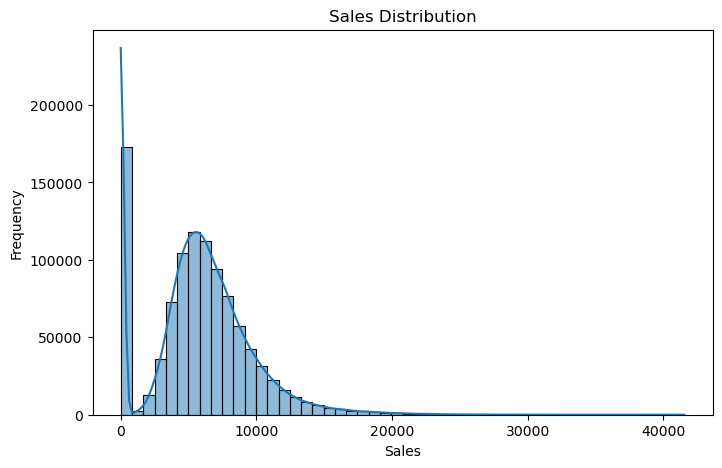

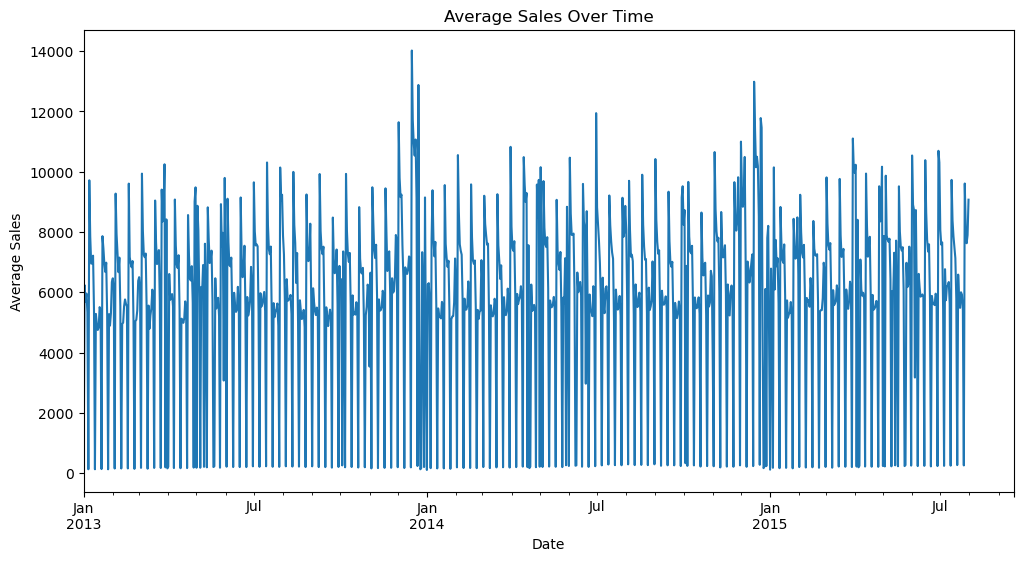

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# 4. Time Series Analysis
plt.figure(figsize=(12,6))
df.groupby('Date')['Sales'].mean().plot()
plt.title("Average Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [24]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [25]:
# Select features and target
features = ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Quarter']
target = 'Sales'
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in y_pred:", np.isnan(y_pred).sum())

NaNs in y_test: 41088
NaNs in y_pred: 0


In [29]:

imputer = SimpleImputer(strategy="mean")
y_test = imputer.fit_transform(y_test.to_numpy().reshape(-1, 1)).flatten()

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.44530656592370554

In [31]:
X_test.columns

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'Quarter'],
      dtype='object')

In [32]:
X_test.head()

,Store,DayOfWeek,Promo,SchoolHoliday,Year,Month,Day,Quarter
846637,23,7,0,0,2013,6,2,2
846638,24,7,0,0,2013,6,2,2
846639,25,7,0,0,2013,6,2,2
846640,26,7,0,0,2013,6,2,2
846641,27,7,0,0,2013,6,2,2


In [33]:
X_test.shape

(211660, 8)

In [34]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'Quarter'],
      dtype='object')

In [35]:
X_train.shape

(846637, 8)

In [36]:
X_test.isnull().sum()

Store            0
DayOfWeek        0
Promo            0
SchoolHoliday    0
Year             0
Month            0
Day              0
Quarter          0
dtype: int64

In [37]:
train['Predicted_Sales'] = model.predict(X_train)
test['Predicted_Sales'] = model.predict(X_test)

In [38]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day,Weak of year,Quarter,Isweekend,BeginningOfMonth,MidOfMonth,EndOfMonth,Predicted_Sales
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1,5549.96
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1,6308.33
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1,8452.30
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1,12404.01
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,2015,7,31,31,3,0,0,1,1,5646.14


In [39]:
train['Loss'] = train['Predicted_Sales']- train['Sales']

In [40]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,...,Month,Day,Weak of year,Quarter,Isweekend,BeginningOfMonth,MidOfMonth,EndOfMonth,Predicted_Sales,Loss
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,5549.96,286.96
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,6308.33,244.33
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,8452.30,138.30
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,12404.01,-1590.99
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,5646.14,824.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846632,18,7,2013-06-02,0.0,0.0,0.0,0,0,0,NaN,...,6,2,22,2,1,1,1,0,0.00,0.00
846633,19,7,2013-06-02,0.0,0.0,0.0,0,0,0,NaN,...,6,2,22,2,1,1,1,0,0.00,0.00
846634,20,7,2013-06-02,0.0,0.0,0.0,0,0,0,NaN,...,6,2,22,2,1,1,1,0,0.00,0.00
846635,21,7,2013-06-02,0.0,0.0,0.0,0,0,0,NaN,...,6,2,22,2,1,1,1,0,0.00,0.00


In [41]:
train.to_csv("/Users/meetpatel/Desktop/project_6/rossmann-store-sales.csv")


In [45]:
import joblib
from joblib import load ,dump
joblib.dump(model,"model_ml.joblib")

['model_ml.joblib']

In [46]:
from flask import Flask,request, jsonify
import joblib
import pickle

In [47]:
app = Flask(__name__)


In [48]:
loaded_model = load('model_ml.joblib')

In [49]:
def predict():
    df = request.get_json(force = True)
    features = df['sale']
    predictions = loaded_model.predict(features)
    return jsonify (predictions.tolist())
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 7, in <module>
    from .connect import *
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 12, in <module>
    import jupyter_client
  File "/opt/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 3, in <module>
    from .asynchronous import AsyncKernelClient
  File "/opt/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/client.py", line 11, in <module>
    from ..chann

SystemExit: 1

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
